In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Conducting exploratory analysis on engine data
df = pd.read_csv("/Users/chiral/git_projects/Predicting_Failure_NASA_Turbofan_Jet_Engine/CMaps/train_FD001.txt", delimiter=' ')

In [3]:
column_names = ["unit_number","cycle_number","operational_setting_1","operational_setting_2","operational_setting_3"]
n_cols = len(df.columns)
print(f"Number of Columns: {n_cols}")


# The rest of the columns are sensor measurements, let's label the remaining by an index 
for k in range(1,len(df.columns)-len(column_names)+1):
    column_names.append("sensor_measurement_{}".format(k))

df.columns = column_names
n_engines = len(df["unit_number"].unique())
print(f"Number of Units: {n_engines}")

Number of Columns: 28
Number of Units: 100


# Appending the total remaining useful life to the end of the dataset

In [4]:
# Getting the max cyle number of each unit
grouped_data = df.groupby("unit_number")["cycle_number"].max().reset_index()
ordering = grouped_data.sort_values(by="cycle_number", ascending=False)["unit_number"].values
# renaming column
grouped_data = grouped_data.rename(columns={"cycle_number":"max_cycles"})
# What are the max and min values

In [20]:
grouped_data.describe()

,unit_number,max_cycles
count,100.000000,100.000000
mean,50.500000,206.310000
std,29.011492,46.342749
min,1.000000,128.000000
25%,25.750000,177.000000
50%,50.500000,199.000000
75%,75.250000,229.250000
max,100.000000,362.000000


<Axes: xlabel='unit_number', ylabel='max_cycles'>

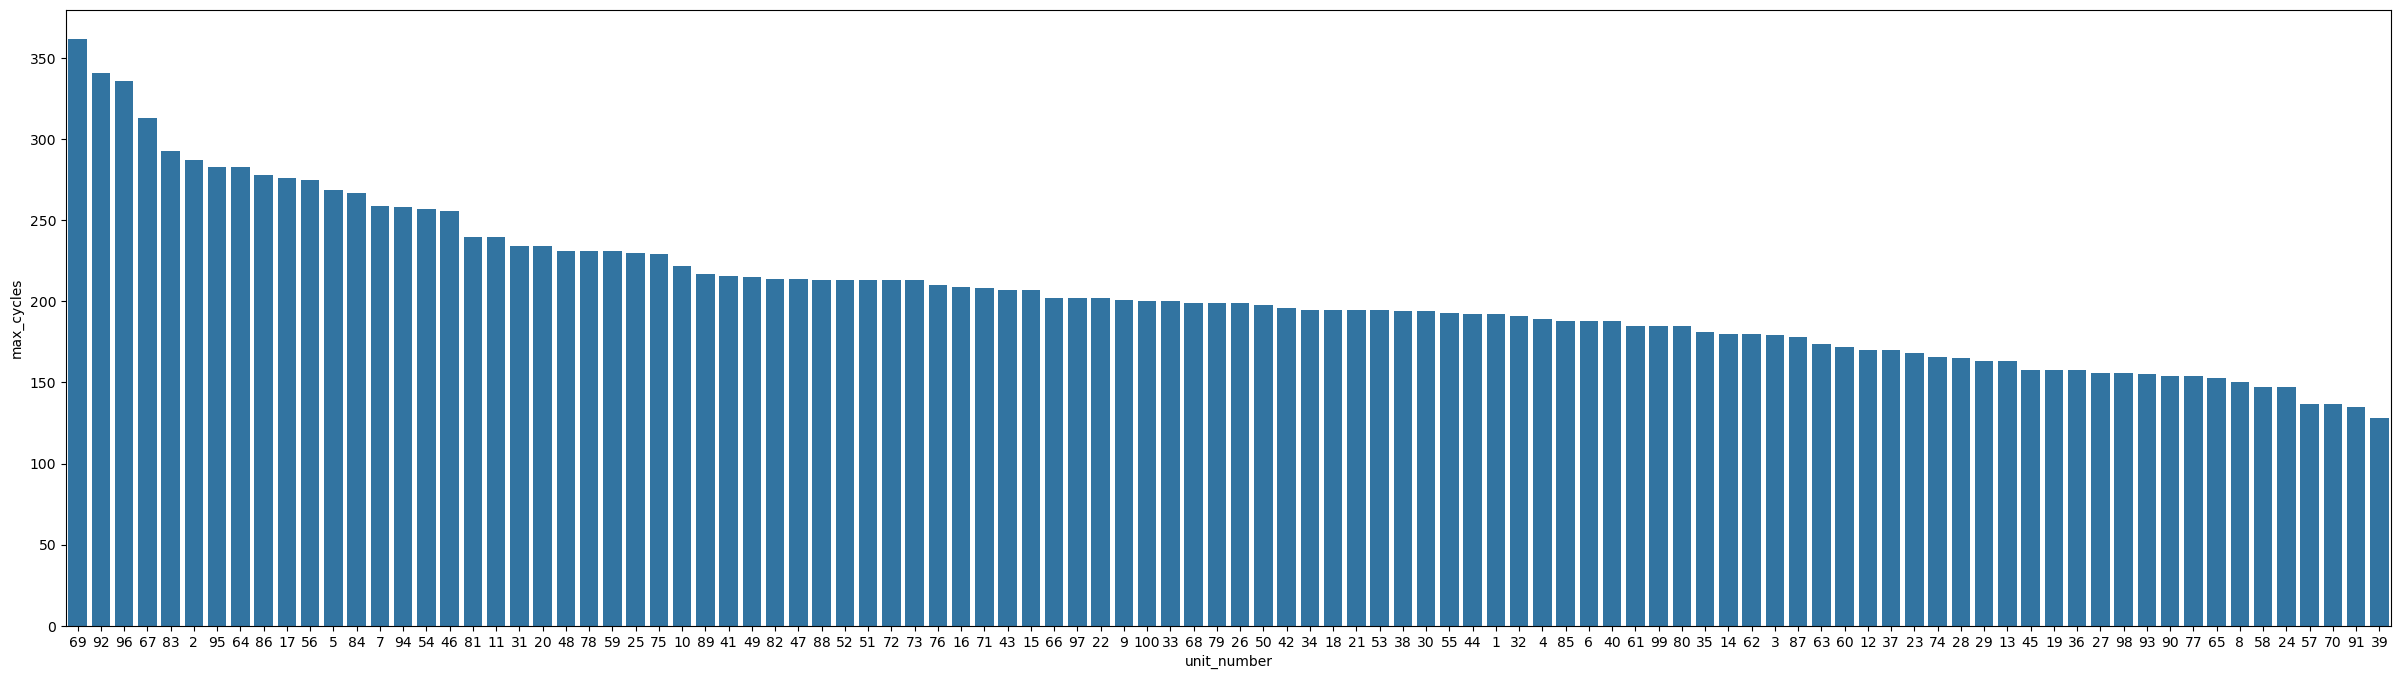

In [6]:
fig = plt.figure(figsize=(30,8))
sns.barplot(data = grouped_data, x="unit_number", y="max_cycles", order=ordering)

In [7]:
# Creating a dictionary to reference max cycles when calculating RUL
max_dict = grouped_data.set_index('unit_number')['max_cycles'].to_dict()
# max_dict

In [8]:
# max_frame = df_test.groupby("unit_number")["cycle_number"].max().to_dict()
# max_frame

In [9]:
# Adding RUL to dataframe
df["RUL"] = df.apply(lambda row: max_dict[row["unit_number"]]-row["cycle_number"], axis=1)

In [21]:
# Ensuring it was done correctly
df[["unit_number","cycle_number","RUL"]][df["unit_number"]==1]

,unit_number,cycle_number,RUL
0,1,2,190.0
1,1,3,189.0
2,1,4,188.0
3,1,5,187.0
4,1,6,186.0
...,...,...,...
186,1,188,4.0
187,1,189,3.0
188,1,190,2.0
189,1,191,1.0


In [11]:
# Lets drop the irrelevant columns
df.drop(["sensor_measurement_22","sensor_measurement_23"], axis=1, inplace=True)

In [12]:
df

,unit_number,cycle_number,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190.0
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189.0
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188.0
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187.0
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4.0
20626,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3.0
20627,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2.0
20628,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1.0


In [13]:
# window_size = 10
# windows = [df.iloc[i:i+window_size] for i in range(len(df) - window_size + 1)]
# windows

In [13]:
# Create a dataset for Unit 1 where the window is 10 cycles long
window_size = 150
unit=1
print(unit)
sub_sample = df[df["unit_number"]==unit]
sub_sample=df.copy()

1


In [22]:
i=0
sub_sample.iloc[i:i+window_size]#[110:]

,unit_number,cycle_number,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190.0
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189.0
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188.0
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187.0
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,147,0.0047,0.0001,100.0,518.67,642.25,1594.85,1409.96,14.62,...,2388.12,8126.13,8.4428,0.03,393,2388,100.0,38.77,23.2684,45.0
146,1,148,0.0010,-0.0004,100.0,518.67,643.02,1590.03,1411.89,14.62,...,2388.15,8124.48,8.4276,0.03,392,2388,100.0,38.77,23.2498,44.0
147,1,149,0.0025,0.0004,100.0,518.67,642.90,1592.78,1410.70,14.62,...,2388.15,8124.34,8.4731,0.03,394,2388,100.0,38.77,23.2565,43.0
148,1,150,0.0010,-0.0003,100.0,518.67,643.06,1589.01,1409.22,14.62,...,2388.21,8122.99,8.4726,0.03,394,2388,100.0,38.68,23.2082,42.0


In [29]:

# Not transposing, pytorch prefers data for LSTM in (batch, timestep, features)
windows = [sub_sample.iloc[i:i+window_size].to_numpy() for i in range(len(sub_sample) - window_size + 1)]


In [30]:
# Comparing df to output
window_start=0
df.iloc[window_start:window_start+10]

,unit_number,cycle_number,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190.0
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189.0
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188.0
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187.0
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,186.0
5,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774,185.0
6,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106,184.0
7,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066,183.0
8,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694,182.0
9,1,11,0.0018,-0.0003,100.0,518.67,642.28,1581.75,1400.64,14.62,...,2388.01,8140.58,8.4340,0.03,392,2388,100.0,38.94,23.4787,181.0


In [31]:
# df.describe()

In [32]:
print(len(windows))

20481


In [33]:
print(windows[0][0:4])

[[ 1.00000e+00  2.00000e+00  1.90000e-03 -3.00000e-04  1.00000e+02
   5.18670e+02  6.42150e+02  1.59182e+03  1.40314e+03  1.46200e+01
   2.16100e+01  5.53750e+02  2.38804e+03  9.04407e+03  1.30000e+00
   4.74900e+01  5.22280e+02  2.38807e+03  8.13149e+03  8.43180e+00
   3.00000e-02  3.92000e+02  2.38800e+03  1.00000e+02  3.90000e+01
   2.34236e+01  1.90000e+02]
 [ 1.00000e+00  3.00000e+00 -4.30000e-03  3.00000e-04  1.00000e+02
   5.18670e+02  6.42350e+02  1.58799e+03  1.40420e+03  1.46200e+01
   2.16100e+01  5.54260e+02  2.38808e+03  9.05294e+03  1.30000e+00
   4.72700e+01  5.22420e+02  2.38803e+03  8.13323e+03  8.41780e+00
   3.00000e-02  3.90000e+02  2.38800e+03  1.00000e+02  3.89500e+01
   2.33442e+01  1.89000e+02]
 [ 1.00000e+00  4.00000e+00  7.00000e-04  0.00000e+00  1.00000e+02
   5.18670e+02  6.42350e+02  1.58279e+03  1.40187e+03  1.46200e+01
   2.16100e+01  5.54450e+02  2.38811e+03  9.04948e+03  1.30000e+00
   4.71300e+01  5.22860e+02  2.38808e+03  8.13383e+03  8.36820e+00
   3

In [38]:
def create_hdf5(unit_num, np_array):
    '''
    Creating the hdf5 dataset according to the unit number
    '''
    # Store the array into an HDF5 file
    with h5py.File(f'../data/train_unit_{unit_num}.h5', 'w') as hf:
        hf.create_dataset(f'engine_data', data=np_array)
    
    # Load the array from the HDF5 file
    with h5py.File(f'../data/train_unit_{unit_num}.h5', 'r') as hf:
        loaded_array = hf[f'engine_data'][:]
    
    # Verify the loaded array
    print(np.array_equal(np_array, loaded_array)) # Should print True

In [39]:
def load_data():
    with h5py.File(f'../data/train_data.h5', 'r') as hf:
        loaded_array = hf[f'engine_data'][:]
    return loaded_array

In [40]:
import numpy as np
import h5py

engine_num = "all"
create_hdf5(engine_num, windows)


True


In [41]:
hf = h5py.File(f'../data/train_unit_{engine_num}.h5', 'r')
hf.keys()


<KeysViewHDF5 ['engine_data']>

In [42]:
hf.keys

<bound method MappingHDF5.keys of <HDF5 file "train_unit_all.h5" (mode r)>>

In [37]:
# print(windows[0][0:4])
print(windows[0])
# print(windows[0:2][-1])

[[ 1.00000e+00  1.00000e+00  1.00000e+00 ...  1.00000e+00  1.00000e+00
   1.00000e+00]
 [ 2.00000e+00  3.00000e+00  4.00000e+00 ...  1.49000e+02  1.50000e+02
   1.51000e+02]
 [ 1.90000e-03 -4.30000e-03  7.00000e-04 ...  2.50000e-03  1.00000e-03
  -1.90000e-03]
 ...
 [ 3.90000e+01  3.89500e+01  3.88800e+01 ...  3.87700e+01  3.86800e+01
   3.85600e+01]
 [ 2.34236e+01  2.33442e+01  2.33739e+01 ...  2.32565e+01  2.32082e+01
   2.32277e+01]
 [ 1.90000e+02  1.89000e+02  1.88000e+02 ...  4.30000e+01  4.20000e+01
   4.10000e+01]]
